In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model

Using TensorFlow backend.


In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [3]:
img_rows, img_cols = 28, 28

In [4]:
train_imgs = train_imgs.reshape(train_imgs.shape[0], img_rows, img_cols, 1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:

train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')

train_imgs /= 255
test_imgs /= 255

In [6]:
num_classes = 10

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())  # Flattens the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [8]:
batch_size = 128 

In [9]:
num_epoch = 5

In [10]:
try:
    print("Attempting to load model....")
    model = load_model("model_digit.h5")
except:
    print("Failed to load model. Creating new model...")
    model_log = model.fit(train_imgs, train_labels,
                          batch_size=batch_size,
                          epochs=num_epoch,
                          verbose=1,
                          validation_data=(test_imgs, test_labels))

    model.save_weights("model_digit.h5")

    model.save("model_digit.h5")
    print("Saved model. Model will now be loaded on next run through")

Attempting to load model....


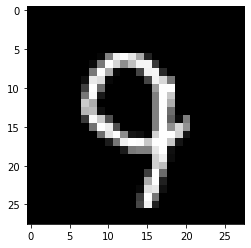

[[1.73824390e-07 2.71800893e-09 8.38201544e-08 1.16714261e-06
  4.71878477e-04 1.21427297e-06 1.22585470e-10 2.47920252e-05
  1.01780286e-04 9.99398947e-01]]


In [11]:
plt.imshow(test_imgs[999].reshape(28, 28), cmap="gray")
plt.show()

print(model.predict(test_imgs[999:1000]))